## Import packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
medals = pd.read_csv('summer.csv')
data = pd.read_csv('Data.csv')
countries = pd.read_csv('dictionary.csv')

## Clean medals data

In [3]:
medals = medals.merge(countries,how='left',left_on='Country',right_on='Code')

In [4]:
medals.head()

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230578


In [5]:
medals['Year'].unique()

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012])

In [6]:
medals.drop(['Athlete','Country_x','Sport','Discipline','Gender','Event'],axis=1,inplace=True)

In [7]:
medals.columns = ['Year','Host','Medal','Country Name','Code','Population','GDP']

In [8]:
medals = medals.replace('Los Angeles', 'United States')
medals = medals.replace('Seoul', 'Korea, South')
medals = medals.replace('Barcelona', 'Spain')
medals = medals.replace('Atlanta', 'United States')
medals = medals.replace('Sydney', 'Australia')
medals = medals.replace('Athens', 'Greece')
medals = medals.replace('Beijing', 'China')
medals = medals.replace('London', 'United Kingdom')

In [9]:
medals.columns

Index(['Year', 'Host', 'Medal', 'Country Name', 'Code', 'Population', 'GDP'], dtype='object')

In [10]:
medals['Country Name'].nunique()

129

In [11]:
medals.head()

,Year,Host,Medal,Country Name,Code,Population,GDP
0,1896,Greece,Gold,Hungary,HUN,9844686.0,12363.543460
1,1896,Greece,Silver,Austria,AUT,8611088.0,43774.985174
2,1896,Greece,Bronze,Greece,GRE,10823732.0,18002.230578
3,1896,Greece,Gold,Greece,GRE,10823732.0,18002.230578
4,1896,Greece,Silver,Greece,GRE,10823732.0,18002.230578


## Clean World bank data

In [12]:
data.head()

,Country Name,Country Code,Series Name,Series Code,1972 [YR1972],1976 [YR1976],1980 [YR1980],1984 [YR1984],1988 [YR1988],1992 [YR1992],1996 [YR1996],2000 [YR2000],2004 [YR2004],2008 [YR2008],2012 [YR2012],2016 [YR2016]
0,Afghanistan,AFG,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.666341,21.385711,19.774789,18.132025,NaN
3,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163713,13.969172,42.400000,69.100000,NaN
4,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.413901,32.500000,63.800000,NaN


In [13]:
series_info = data.loc[:,['Series Name','Series Code']]

In [14]:
series_info.head()

,Series Name,Series Code
0,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05
1,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS
3,Access to electricity (% of population),EG.ELC.ACCS.ZS
4,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS


In [15]:
data['Series Code'].nunique()

1574

In [16]:
#data.pivot(index='Country Code', columns='variable', values='value')

In [17]:
data_test = data.copy()

In [18]:
data.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1972 [YR1972]', '1976 [YR1976]', '1980 [YR1980]', '1984 [YR1984]',
       '1988 [YR1988]', '1992 [YR1992]', '1996 [YR1996]', '2000 [YR2000]',
       '2004 [YR2004]', '2008 [YR2008]', '2012 [YR2012]', '2016 [YR2016]'],
      dtype='object')

In [19]:
del data_test['Country Code']

In [20]:
del data_test['Series Name']

In [21]:
data_test_1 = pd.melt(data_test, id_vars=['Country Name','Series Code'], value_vars=data_test.columns.drop(['Country Name','Series Code']).tolist())

In [22]:
data_test_1 = data_test_1.dropna()

In [23]:
data_test_1.columns

Index(['Country Name', 'Series Code', 'variable', 'value'], dtype='object')

In [24]:
data_test_1.shape

(1937444, 4)

In [25]:
data_test_1[['Country Name','variable']].drop_duplicates().shape

(3156, 2)

In [26]:
data_test_1.head()

,Country Name,Series Code,variable,value
29,Afghanistan,NY.ADJ.NNTY.CD,1972 [YR1972],1.553791e+09
32,Afghanistan,NY.ADJ.NNTY.PC.CD,1972 [YR1972],1.325541e+02
37,Afghanistan,NY.ADJ.DCO2.GN.ZS,1972 [YR1972],1.815273e-01
38,Afghanistan,NY.ADJ.DCO2.CD,1972 [YR1972],2.295967e+06
39,Afghanistan,NY.ADJ.DKAP.GN.ZS,1972 [YR1972],4.607557e+00


In [27]:
data_test_1.index = data_test_1[['Country Name','variable']]

In [28]:
data_test_1.head()

,Country Name,Series Code,variable,value
"(Afghanistan, 1972 [YR1972])",Afghanistan,NY.ADJ.NNTY.CD,1972 [YR1972],1.553791e+09
"(Afghanistan, 1972 [YR1972])",Afghanistan,NY.ADJ.NNTY.PC.CD,1972 [YR1972],1.325541e+02
"(Afghanistan, 1972 [YR1972])",Afghanistan,NY.ADJ.DCO2.GN.ZS,1972 [YR1972],1.815273e-01
"(Afghanistan, 1972 [YR1972])",Afghanistan,NY.ADJ.DCO2.CD,1972 [YR1972],2.295967e+06
"(Afghanistan, 1972 [YR1972])",Afghanistan,NY.ADJ.DKAP.GN.ZS,1972 [YR1972],4.607557e+00


In [29]:
#del data_test_1['Country Name']

In [30]:
#del data_test_1['variable']

In [31]:
data_test_2 = data_test_1.pivot_table(values='value',index=['Country Name','variable'],columns='Series Code').reset_index()

In [32]:
data_test_2.shape

(3156, 1536)

In [33]:
data_test_2.head()

Series Code,Country Name,variable,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,Afghanistan,1972 [YR1972],600.0,NaN,NaN,380460.0,58.275894,7910000.0,0.674803,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1976 [YR1976],530.0,NaN,NaN,380480.0,58.278957,7910000.0,0.616029,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1980 [YR1980],400.0,NaN,NaN,380490.0,58.280489,7910000.0,0.597055,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1984 [YR1984],200.0,NaN,NaN,380540.0,58.288148,7910000.0,0.656589,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1988 [YR1988],120.0,NaN,NaN,380400.0,58.266703,7910000.0,0.685389,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data_test_2 = data_test_2.rename(columns={'variable':'Year'})

In [35]:
data_test_2['Year'] =  data_test_2['Year'].map(lambda x : x[:5])

In [36]:
data_test_2.columns

Index(['Country Name', 'Year', 'AG.AGR.TRAC.NO', 'AG.CON.FERT.PT.ZS',
       'AG.CON.FERT.ZS', 'AG.LND.AGRI.K2', 'AG.LND.AGRI.ZS', 'AG.LND.ARBL.HA',
       'AG.LND.ARBL.HA.PC', 'AG.LND.ARBL.ZS',
       ...
       'per_sa_allsa.cov_q4_tot', 'per_sa_allsa.cov_q5_tot',
       'per_si_allsi.adq_pop_tot', 'per_si_allsi.ben_q1_tot',
       'per_si_allsi.cov_pop_tot', 'per_si_allsi.cov_q1_tot',
       'per_si_allsi.cov_q2_tot', 'per_si_allsi.cov_q3_tot',
       'per_si_allsi.cov_q4_tot', 'per_si_allsi.cov_q5_tot'],
      dtype='object', name='Series Code', length=1536)

In [37]:
df = data_test_2.copy()

In [38]:
df.columns

Index(['Country Name', 'Year', 'AG.AGR.TRAC.NO', 'AG.CON.FERT.PT.ZS',
       'AG.CON.FERT.ZS', 'AG.LND.AGRI.K2', 'AG.LND.AGRI.ZS', 'AG.LND.ARBL.HA',
       'AG.LND.ARBL.HA.PC', 'AG.LND.ARBL.ZS',
       ...
       'per_sa_allsa.cov_q4_tot', 'per_sa_allsa.cov_q5_tot',
       'per_si_allsi.adq_pop_tot', 'per_si_allsi.ben_q1_tot',
       'per_si_allsi.cov_pop_tot', 'per_si_allsi.cov_q1_tot',
       'per_si_allsi.cov_q2_tot', 'per_si_allsi.cov_q3_tot',
       'per_si_allsi.cov_q4_tot', 'per_si_allsi.cov_q5_tot'],
      dtype='object', name='Series Code', length=1536)

In [39]:
df.head()

Series Code,Country Name,Year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,Afghanistan,1972,600.0,NaN,NaN,380460.0,58.275894,7910000.0,0.674803,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1976,530.0,NaN,NaN,380480.0,58.278957,7910000.0,0.616029,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1980,400.0,NaN,NaN,380490.0,58.280489,7910000.0,0.597055,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1984,200.0,NaN,NaN,380540.0,58.288148,7910000.0,0.656589,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1988,120.0,NaN,NaN,380400.0,58.266703,7910000.0,0.685389,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
medals.drop(['Population','GDP'],axis=1,inplace=True)

In [41]:
medals_grouped = medals.groupby(['Year','Host','Country Name']).count().reset_index()

In [42]:
df1 = medals_grouped[medals_grouped['Year']>1983]

In [43]:
df1.columns

Index(['Year', 'Host', 'Country Name', 'Medal', 'Code'], dtype='object')

In [44]:
df1['Host'].unique()

array(['United States', 'Korea, South', 'Spain', 'Australia', 'Greece',
       'China', 'United Kingdom'], dtype=object)

In [45]:
df1.head()

,Year,Host,Country Name,Medal,Code
526,1984,United States,Algeria,2,2
527,1984,United States,Australia,50,50
528,1984,United States,Austria,3,3
529,1984,United States,Belgium,5,5
530,1984,United States,Brazil,37,37


In [46]:
df1.shape

(542, 5)

In [47]:
df1['Country Name'].nunique()

121

In [48]:
df.shape

(3156, 1536)

In [49]:
df1.drop(['Code'],axis=1,inplace=True)

In [50]:
df.head()

Series Code,Country Name,Year,AG.AGR.TRAC.NO,AG.CON.FERT.PT.ZS,AG.CON.FERT.ZS,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,...,per_sa_allsa.cov_q4_tot,per_sa_allsa.cov_q5_tot,per_si_allsi.adq_pop_tot,per_si_allsi.ben_q1_tot,per_si_allsi.cov_pop_tot,per_si_allsi.cov_q1_tot,per_si_allsi.cov_q2_tot,per_si_allsi.cov_q3_tot,per_si_allsi.cov_q4_tot,per_si_allsi.cov_q5_tot
0,Afghanistan,1972,600.0,NaN,NaN,380460.0,58.275894,7910000.0,0.674803,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1976,530.0,NaN,NaN,380480.0,58.278957,7910000.0,0.616029,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1980,400.0,NaN,NaN,380490.0,58.280489,7910000.0,0.597055,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1984,200.0,NaN,NaN,380540.0,58.288148,7910000.0,0.656589,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1988,120.0,NaN,NaN,380400.0,58.266703,7910000.0,0.685389,12.115921,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df['Year'].unique()

array(['1972 ', '1976 ', '1980 ', '1984 ', '1988 ', '1992 ', '1996 ',
       '2000 ', '2004 ', '2008 ', '2012 ', '2016 '], dtype=object)

In [52]:
df1['Year'].unique()

array([1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012])

In [53]:
df1['Year'] = df1['Year'].astype(int)
df['Year'] = df['Year'].astype(int)

In [54]:
df1['Country Name'] = df1['Country Name'].astype(str)
df['Country Name'] = df['Country Name'].astype(str)

In [55]:
master = df1.merge(df, how='left',on=['Country Name','Year'])

In [56]:
master['Host'] = master['Host'].astype(str)
master['Country Name'] = master['Country Name'].astype(str)

In [57]:
master.shape

(542, 1538)

In [58]:
# Drop rows with greater than 85% NA
master = master.loc[:,master.isnull().sum()<81]

In [59]:
master.head()

,Year,Host,Country Name,Medal,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CREL.HA,...,TM.VAL.MRCH.R1.ZS,TM.VAL.MRCH.R5.ZS,TM.VAL.MRCH.RS.ZS,TM.VAL.MRCH.WL.CD,TX.VAL.MRCH.CD.WT,TX.VAL.MRCH.HI.ZS,TX.VAL.MRCH.OR.ZS,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.RS.ZS,TX.VAL.MRCH.WL.CD
0,1984,United States,Algeria,2,396100.0,16.630699,6915000.0,0.315842,2.903340,2670070.0,...,1.659537,0.245005,9.277687,1.048175e+10,1.279500e+10,91.598288,2.599564,0.023440,5.178307,1.305462e+10
1,1984,United States,Australia,50,4730390.0,61.575179,47080000.0,3.028821,6.128373,17772613.0,...,5.468713,0.809834,1.734931,2.578431e+10,2.311100e+10,74.465332,18.790133,10.492508,6.744535,2.389238e+10
2,1984,United States,Austria,3,30332.0,36.730443,1445000.0,0.191101,17.498184,1051447.0,...,0.770949,0.271232,10.896591,1.965110e+10,1.573900e+10,76.790718,11.064868,1.211709,12.144414,1.573810e+10
3,1984,United States,Belgium,5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.189300e+10,NaN,NaN,NaN,NaN,NaN
4,1984,United States,Brazil,37,2299240.0,27.508991,47100000.0,0.354667,5.635225,19502145.0,...,3.512315,0.045168,2.714480,1.673090e+10,2.700500e+10,68.594965,15.440812,2.424431,6.291346,2.700551e+10


In [60]:
master.isnull().sum()

Year                  0
Host                  0
Country Name          0
Medal                 0
AG.LND.AGRI.K2       72
AG.LND.AGRI.ZS       72
AG.LND.ARBL.HA       72
AG.LND.ARBL.HA.PC    72
AG.LND.ARBL.ZS       72
AG.LND.CREL.HA       78
AG.LND.CROP.ZS       76
AG.LND.TOTL.K2       71
AG.PRD.CREL.MT       78
AG.PRD.CROP.XD       73
AG.PRD.FOOD.XD       73
AG.PRD.LVSK.XD       73
AG.SRF.TOTL.K2       71
AG.YLD.CREL.KG       78
EG.ELC.COAL.ZS       78
EG.ELC.FOSL.ZS       78
EG.ELC.HYRO.ZS       78
EG.ELC.LOSS.ZS       79
EG.ELC.NGAS.ZS       78
EG.ELC.NUCL.ZS       78
EG.ELC.PETR.ZS       78
EG.ELC.RNWX.KH       78
EG.ELC.RNWX.ZS       78
EG.IMP.CONS.ZS       78
EG.USE.COMM.CL.ZS    79
EG.USE.CRNW.ZS       78
                     ..
SP.POP.80UP.MA.5Y    67
SP.POP.DPND          67
SP.POP.DPND.OL       67
SP.POP.DPND.YG       67
SP.POP.GROW          67
SP.POP.TOTL          67
SP.POP.TOTL.FE.IN    67
SP.POP.TOTL.FE.ZS    67
SP.POP.TOTL.MA.IN    67
SP.POP.TOTL.MA.ZS    67
SP.RUR.TOTL     

In [61]:
def remove_high_correlation(dataset, threshold,target_var):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns and colname!=target_var:
                    print(colname)
                    del dataset[colname] # deleting the column from the dataset

    return dataset

In [62]:
data= remove_high_correlation(master,0.8,['Medal','Country Name','Host','Year'])

AG.LND.ARBL.HA
AG.LND.CREL.HA
AG.LND.TOTL.K2
AG.PRD.CREL.MT
AG.PRD.FOOD.XD
AG.PRD.LVSK.XD
AG.SRF.TOTL.K2
EG.ELC.HYRO.ZS
EG.USE.PCAP.KG.OE
EN.ATM.CO2E.KT
EN.ATM.CO2E.LF.KT
EN.ATM.CO2E.PC
EN.ATM.CO2E.SF.KT
EN.ATM.CO2E.SF.ZS
EN.ATM.GHGT.KT.CE
EN.ATM.METH.KT.CE
EN.ATM.NOXE.KT.CE
ER.FSH.PROD.MT
IT.CEL.SETS.P2
IT.MLT.MAIN
NE.GDI.TOTL.CD
NY.ADJ.AEDU.CD
NY.ADJ.DCO2.CD
NY.ADJ.DCO2.GN.ZS
NY.ADJ.DKAP.CD
NY.ADJ.DNGY.CD
NY.GDP.MINR.RT.ZS
NY.GDP.MKTP.CD
NY.GDP.MKTP.CN
NY.GDP.MKTP.KD
NY.GDP.MKTP.KN
NY.GDP.PCAP.CN
NY.GDP.PCAP.KD
NY.GDP.PCAP.KD.ZG
NY.GDP.PCAP.KN
NY.GDP.TOTL.RT.ZS
NY.GNP.MKTP.CD
NY.GNP.MKTP.CN
NY.GNP.PCAP.CN
PA.NUS.ATLS
SH.DTH.MORT
SH.DTH.NMRT
SH.DYN.NMRT
SH.IMM.MEAS
SP.DYN.AMRT.FE
SP.DYN.AMRT.MA
SP.DYN.CBRT.IN
SP.DYN.IMRT.IN
SP.DYN.LE00.FE.IN
SP.DYN.LE00.IN
SP.DYN.LE00.MA.IN
SP.DYN.TFRT.IN
SP.DYN.TO65.FE.ZS
SP.DYN.TO65.MA.ZS
SP.POP.0004.FE.5Y
SP.POP.0004.MA.5Y
SP.POP.0014.FE.IN
SP.POP.0014.FE.ZS
SP.POP.0014.MA.IN
SP.POP.0014.MA.ZS
SP.POP.0014.TO
SP.POP.0014.TO.ZS
SP.POP.0509.FE.5Y
SP.P

In [63]:
data.head()

,Year,Host,Country Name,Medal,AG.LND.AGRI.K2,AG.LND.AGRI.ZS,AG.LND.ARBL.HA.PC,AG.LND.ARBL.ZS,AG.LND.CROP.ZS,AG.PRD.CROP.XD,...,TG.VAL.TOTL.GD.ZS,TM.VAL.MRCH.HI.ZS,TM.VAL.MRCH.OR.ZS,TM.VAL.MRCH.R1.ZS,TM.VAL.MRCH.R5.ZS,TM.VAL.MRCH.RS.ZS,TX.VAL.MRCH.HI.ZS,TX.VAL.MRCH.OR.ZS,TX.VAL.MRCH.R1.ZS,TX.VAL.MRCH.RS.ZS
0,1984,United States,Algeria,2,396100.0,16.630699,0.315842,2.903340,0.249817,35.13,...,42.986480,80.469712,9.371312,1.659537,0.245005,9.277687,91.598288,2.599564,0.023440,5.178307
1,1984,United States,Australia,50,4730390.0,61.575179,3.028821,6.128373,0.020697,67.11,...,25.337991,89.940510,8.324559,5.468713,0.809834,1.734931,74.465332,18.790133,10.492508,6.744535
2,1984,United States,Austria,3,30332.0,36.730443,0.191101,17.498184,0.932429,93.04,...,52.022976,80.416872,8.686537,0.770949,0.271232,10.896591,76.790718,11.064868,1.211709,12.144414
3,1984,United States,Belgium,5,NaN,NaN,NaN,NaN,NaN,NaN,...,128.111615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,United States,Brazil,37,2299240.0,27.508991,0.354667,5.635225,0.756628,52.21,...,20.196254,55.949246,28.447571,3.512315,0.045168,2.714480,68.594965,15.440812,2.424431,6.291346


In [83]:
data.to_csv('Final_Raw_Data.csv')

In [64]:
data =data.fillna(0)
df = data.drop(['Year','Host','Country Name','Medal'],axis=1).copy()

In [82]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,211
0,0.003012,0.075755,0.194592,0.104279,0.047107,0.012627,0.123793,0.026688,0.000000,0.959578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.147590,0.904694,0.720477,1.000000,0.099434,0.001046,0.236486,0.078459,0.751809,0.887654,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006024,0.005801,0.429774,0.063094,0.283910,0.047131,0.327860,0.248223,0.116096,0.287185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.347104,0.472453,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.108434,0.439733,0.321876,0.117097,0.091432,0.038245,0.183981,0.081774,0.027845,0.046279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Decision Tree

In [65]:
# Create dummies for Decision Tree analysis
df  = pd.get_dummies(data=data, columns=['Year','Host', 'Country Name'])

In [66]:
# Define target and causal varaiables, y and x
y=df['Medal']
x = df.drop(['Medal'],axis = 1)

In [67]:
# Create a new tree with define characteristics
dt = DecisionTreeClassifier(min_samples_split=200, random_state=99,max_leaf_nodes=20)

In [68]:
# Fit the data set
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

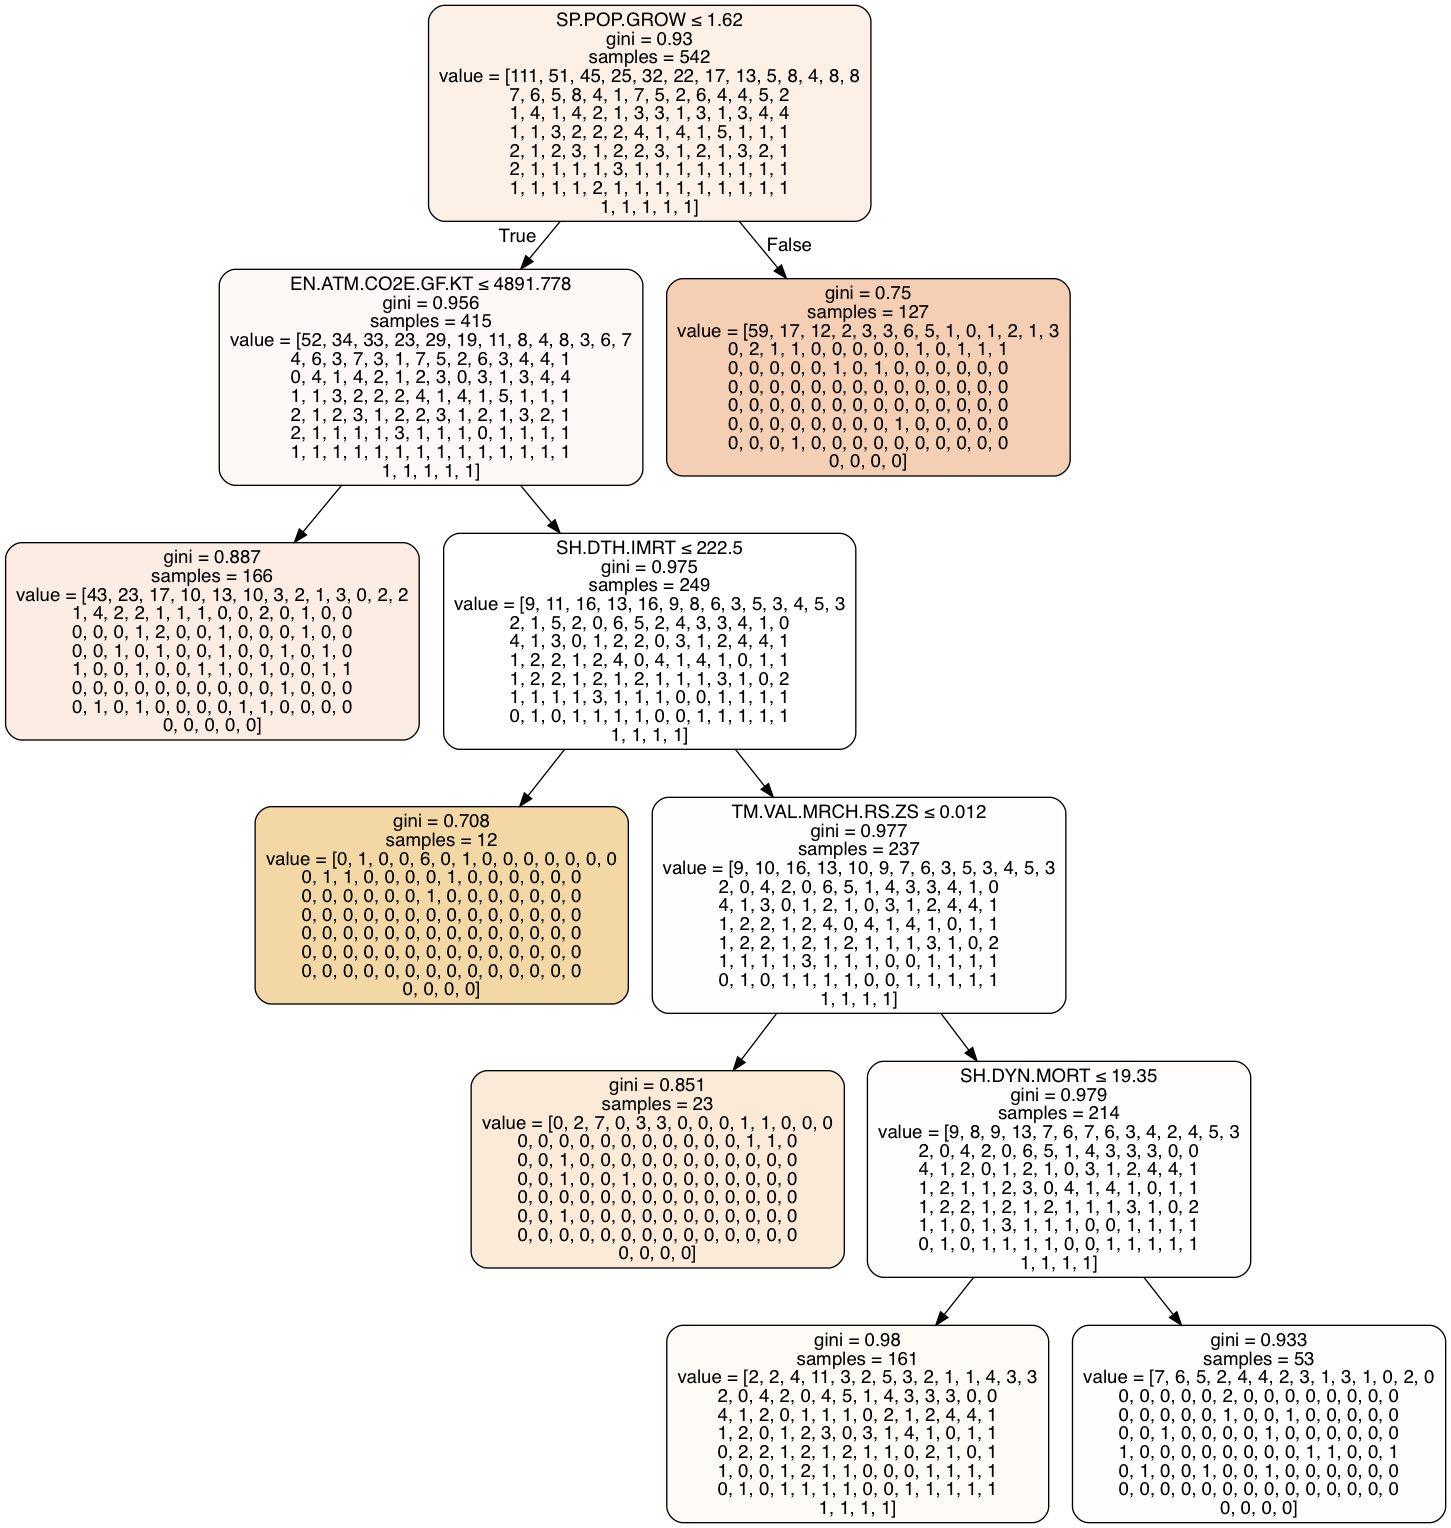

In [69]:
# Plot the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=list(x))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [70]:
# Identify the top 5 important features required to identify the target - Withdrawal final status
feature_imp = dt.feature_importances_
feature_names = x.keys().values
imp_features = sorted(zip(feature_names,feature_imp),key = lambda x:x[1], reverse=True)
imp_features = pd.DataFrame(imp_features[:5])
imp_features

,0,1
0,SP.POP.GROW,0.465436
1,EN.ATM.CO2E.GF.KT,0.250337
2,SH.DTH.IMRT,0.110756
3,TM.VAL.MRCH.RS.ZS,0.091396
4,SH.DYN.MORT,0.082074


In [71]:
# Classification error and accuracy of the matrix
z=dt.predict(x)
pd.crosstab(z,y)

Medal,1,2,3,4,5,6,7,8,9,10,...,192,193,198,224,248,250,260,264,315,333
row_0,,,,,,,,,,,,,,,,,,,,,
1,109,46,34,14,20,17,11,10,3,6,...,1,0,0,0,0,0,0,0,0,0
3,0,2,7,0,3,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2,2,4,11,3,2,5,3,2,1,...,0,1,1,1,1,1,1,1,1,1
5,0,1,0,0,6,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
final = imp_features.merge(series_info, how='left',right_on='Series Code',left_on=0)

In [73]:
final = final.drop_duplicates()

In [74]:
final.drop([0],axis=1, inplace=True)

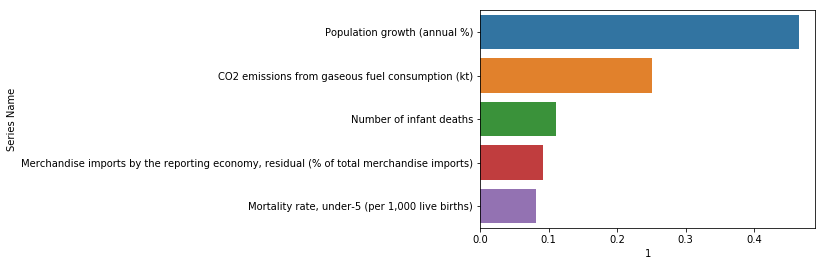

In [75]:
sns.barplot(x=final[1],y=final['Series Name'], data=final)

# PCA

In [76]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(df)

In [78]:
pca.n_components

50

In [79]:
pca.explained_variance_ratio_.sum()

0.8794455657797564

In [80]:
principalDf = pd.DataFrame(data = principalComponents)

In [81]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.079421,0.792502,0.172934,0.314950,0.055201,-0.420449,-0.459245,-0.147671,-0.072629,0.855631,...,0.097159,0.104652,-0.237682,-0.100524,-0.130339,-0.016525,0.432585,-0.195758,-0.046760,-0.176450
1,-0.448208,0.580958,0.061537,0.326740,0.311845,-0.748728,-0.210620,0.335867,0.290541,-0.527583,...,0.187925,0.122233,0.041555,0.069226,0.051957,0.039404,0.020918,0.037072,0.032427,-0.006106
2,-0.247214,0.838369,0.093136,0.188243,0.032953,-0.246174,0.507533,0.108853,-0.032876,0.023708,...,-0.126262,0.153200,-0.104334,0.031643,0.051306,-0.120211,-0.136062,-0.192317,0.262160,-0.223144
3,0.207612,0.653959,0.094166,0.258578,0.123244,-0.442287,0.495682,0.219325,-0.046694,-0.025941,...,0.162027,0.169665,0.199616,-0.030353,0.119719,0.059386,-0.005775,-0.108150,0.033503,0.036219
4,0.076692,1.068447,0.219330,0.230123,-0.214115,0.287694,0.247243,-0.359545,-0.117865,-0.350183,...,-0.053623,0.035196,-0.044136,-0.030291,0.030692,-0.082387,-0.070070,0.054200,0.033721,0.066582
